In [2]:
# -*- coding: utf-8 -*-
"""
Created on Thu Sep 26 22:01:05 2024

@author: Yunus
"""

'\nCreated on Thu Sep 26 22:01:05 2024\n\n@author: Yunus\n'

In [4]:
#pip install networkx matplotlib

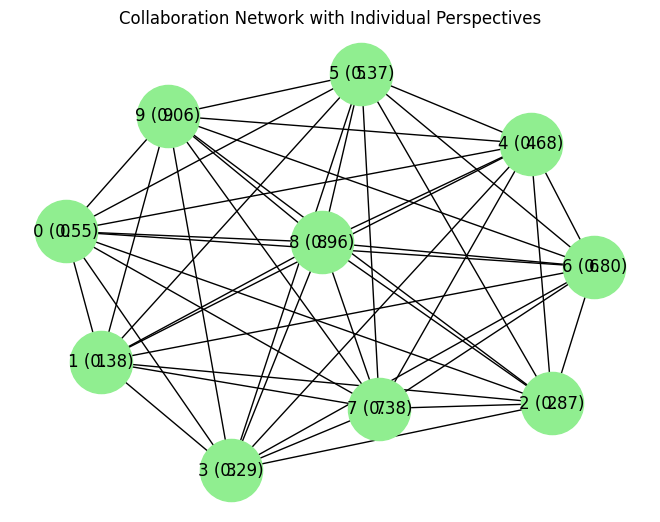

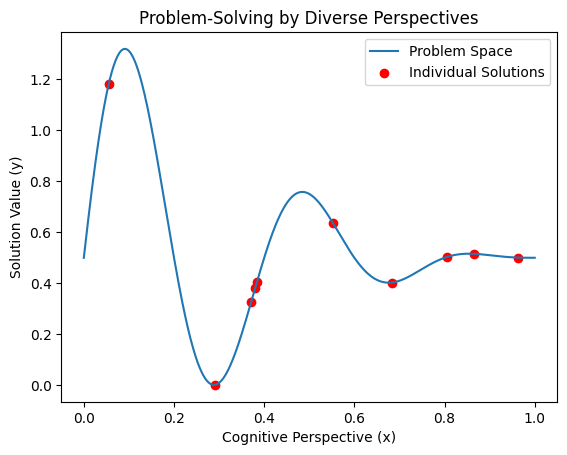


Best solution found by node 3 with perspective 0.29: 0.0021

Homogeneous group (same perspective for all):
Best solution in homogeneous group: 0.7500


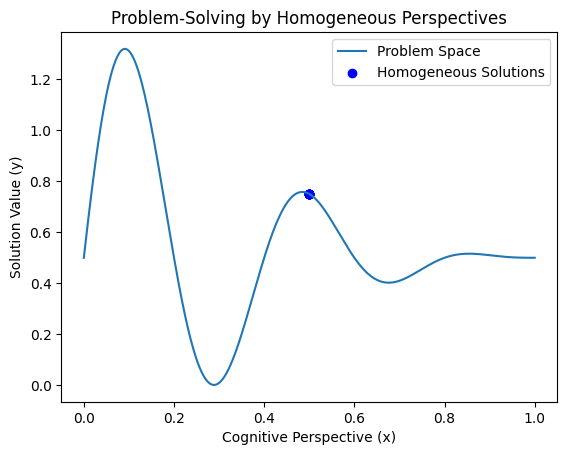

In [14]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

# Create a graph
G = nx.Graph()

# Add nodes (representing individuals)
num_individuals = 10
G.add_nodes_from(range(num_individuals))

# Assign each node a random "perspective" or cognitive approach
# In this example, perspectives are random values between 0 and 1
# A higher diversity means nodes have more distinct values
perspectives = np.random.rand(num_individuals)
nx.set_node_attributes(G, {i: perspectives[i] for i in range(num_individuals)}, 'perspective')

# Define connections (edges) between individuals representing collaboration
# For simplicity, we use a complete graph where every node is connected
for i in range(num_individuals):
    for j in range(i + 1, num_individuals):
        G.add_edge(i, j)

# Plot the network
pos = nx.spring_layout(G)
perspective_labels = nx.get_node_attributes(G, 'perspective')
nx.draw(G, pos, with_labels=True, node_color='lightgreen', node_size=2000, font_size=12)
nx.draw_networkx_labels(G, pos, labels={i: f'{i} ({perspective_labels[i]:.2f})' for i in G.nodes()}, font_color='black')
plt.title("Collaboration Network with Individual Perspectives")
plt.show()

# Problem space: Complex problem represented by finding the minimum of a function
# A group with diverse perspectives will explore more solutions.
def complex_problem(x):
    # A complex, non-linear function with many local minima
    return np.sin(5 * np.pi * x) * (1 - x)**2 + 0.5

# Simulate problem-solving by the group
# Each individual starts with their own perspective and explores the problem space
solutions = {}
for i in G.nodes:
    start_value = perspective_labels[i]
    solution = complex_problem(start_value)
    solutions[i] = solution

# Visualize the problem space
x_values = np.linspace(0, 1, 500)
y_values = complex_problem(x_values)
plt.plot(x_values, y_values, label='Problem Space')
plt.scatter(list(perspective_labels.values()), list(solutions.values()), color='red', label='Individual Solutions')
plt.title("Problem-Solving by Diverse Perspectives")
plt.xlabel("Cognitive Perspective (x)")
plt.ylabel("Solution Value (y)")
plt.legend()
plt.show()

# Finding the best solution (lowest value in the function) as a group
best_solution_node = min(solutions, key=solutions.get)
best_solution_value = solutions[best_solution_node]
print(f"\nBest solution found by node {best_solution_node} with perspective {perspective_labels[best_solution_node]:.2f}: {best_solution_value:.4f}")

# Homogeneous group (e.g., all perspectives are similar)
homogeneous_perspectives = np.full(num_individuals, 0.5)  # All individuals think the same way
homogeneous_solutions = {i: complex_problem(homogeneous_perspectives[i]) for i in G.nodes}

# Compare the diverse group vs homogeneous group solutions
print("\nHomogeneous group (same perspective for all):")
homogeneous_best_solution_value = min(homogeneous_solutions.values())
print(f"Best solution in homogeneous group: {homogeneous_best_solution_value:.4f}")

# Visualize the problem-solving by homogeneous group
plt.plot(x_values, y_values, label='Problem Space')
plt.scatter(list(homogeneous_perspectives), list(homogeneous_solutions.values()), color='blue', label='Homogeneous Solutions')
plt.title("Problem-Solving by Homogeneous Perspectives")
plt.xlabel("Cognitive Perspective (x)")
plt.ylabel("Solution Value (y)")
plt.legend()
plt.show()


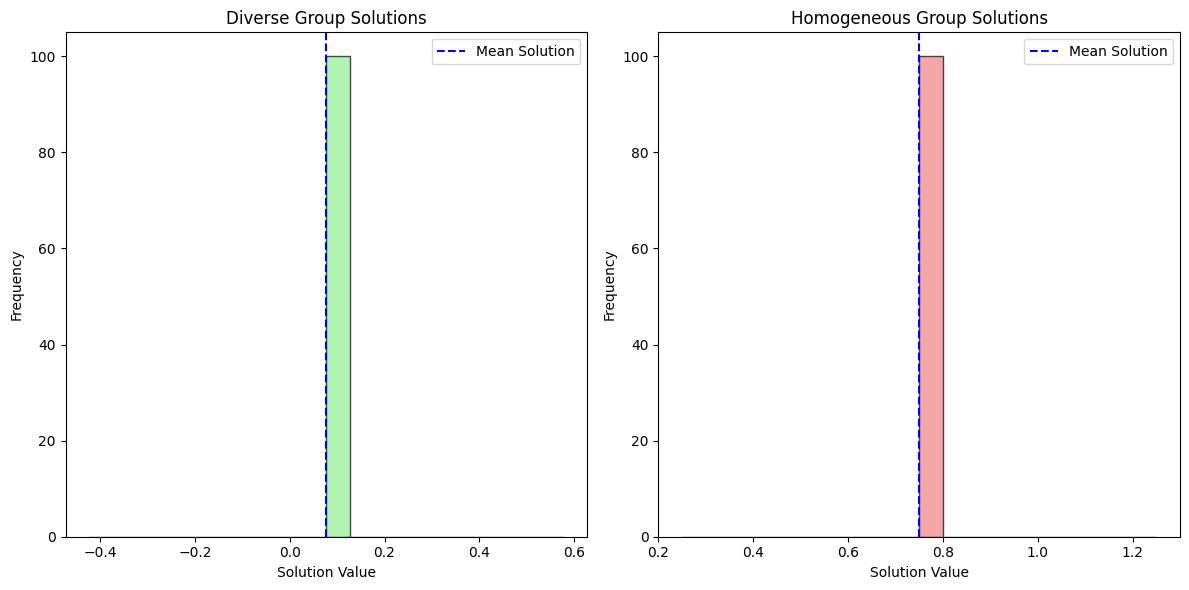

Diverse Group: Best Solution = 0.0776, Mean Solution = 0.0776
Homogeneous Group: Best Solution = 0.7500, Mean Solution = 0.7500


In [4]:
# Function to simulate problem-solving
def simulate_problem_solving(num_individuals, diverse=True, runs=10):
    # Create a graph
    G = nx.Graph()

    # Add nodes
    G.add_nodes_from(range(num_individuals))

    # Assign perspectives
    if diverse:
        perspectives = np.random.rand(num_individuals)
    else:
        perspectives = np.full(num_individuals, 0.5)  # Homogeneous perspective

    nx.set_node_attributes(G, {i: perspectives[i] for i in range(num_individuals)}, 'perspective')

    # Create complete graph
    for i in range(num_individuals):
        for j in range(i + 1, num_individuals):
            G.add_edge(i, j)

    best_solutions = []

    # Simulate multiple runs
    for _ in range(runs):
        solutions = {}
        for i in G.nodes:
            start_value = perspectives[i]
            solution = complex_problem(start_value)
            solutions[i] = solution
        
        # Store the best solution for this run
        best_solution_node = min(solutions, key=solutions.get)
        best_solutions.append(solutions[best_solution_node])

    return best_solutions, perspectives

# Problem space
def complex_problem(x):
    return np.sin(5 * np.pi * x) * (1 - x)**2 + 0.5

# Set parameters
num_individuals = 10
runs = 100

# Simulate diverse and homogeneous groups
diverse_best_solutions, diverse_perspectives = simulate_problem_solving(num_individuals, diverse=True, runs=runs)
homogeneous_best_solutions, homogeneous_perspectives = simulate_problem_solving(num_individuals, diverse=False, runs=runs)

# Plotting the results
plt.figure(figsize=(12, 6))

# Diverse Group
plt.subplot(1, 2, 1)
plt.hist(diverse_best_solutions, bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(diverse_best_solutions), color='blue', linestyle='dashed', linewidth=1.5, label='Mean Solution')
plt.title("Diverse Group Solutions")
plt.xlabel("Solution Value")
plt.ylabel("Frequency")
plt.legend()

# Homogeneous Group
plt.subplot(1, 2, 2)
plt.hist(homogeneous_best_solutions, bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(homogeneous_best_solutions), color='blue', linestyle='dashed', linewidth=1.5, label='Mean Solution')
plt.title("Homogeneous Group Solutions")
plt.xlabel("Solution Value")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

# Summary of results
print(f"Diverse Group: Best Solution = {min(diverse_best_solutions):.4f}, Mean Solution = {np.mean(diverse_best_solutions):.4f}")
print(f"Homogeneous Group: Best Solution = {min(homogeneous_best_solutions):.4f}, Mean Solution = {np.mean(homogeneous_best_solutions):.4f}")


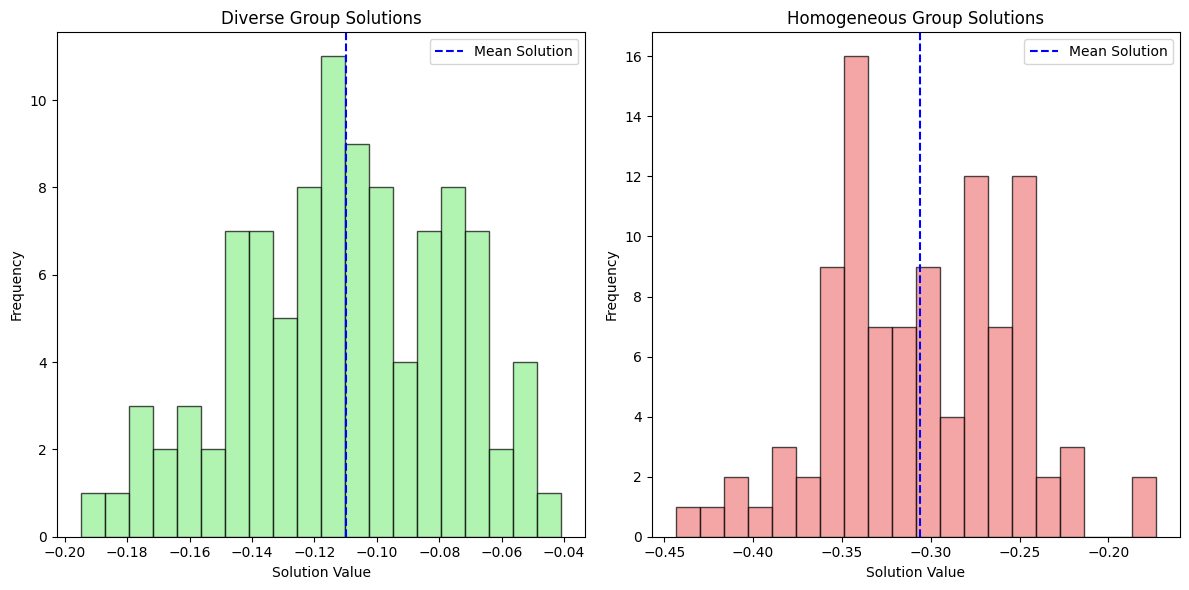

Diverse Group: Best Solution = -0.1948, Mean Solution = -0.1099
Homogeneous Group: Best Solution = -0.4437, Mean Solution = -0.3060


In [6]:
# Function to simulate problem-solving
def simulate_problem_solving(num_individuals, diverse=True, runs=10):
    # Create a graph
    G = nx.Graph()

    # Add nodes
    G.add_nodes_from(range(num_individuals))

    # Assign perspectives
    if diverse:
        # Diverse group with more varied perspectives
        perspectives = np.random.uniform(0, 1, num_individuals)
    else:
        # Homogeneous group but with some variability
        perspectives = np.random.normal(loc=0.5, scale=0.1, size=num_individuals)

    nx.set_node_attributes(G, {i: perspectives[i] for i in range(num_individuals)}, 'perspective')

    # Create complete graph
    for i in range(num_individuals):
        for j in range(i + 1, num_individuals):
            G.add_edge(i, j)

    best_solutions = []

    # Simulate multiple runs
    for _ in range(runs):
        solutions = {}
        for i in G.nodes:
            start_value = perspectives[i]
            solution = complex_problem(start_value)
            solutions[i] = solution
        
        # Store the best solution for this run
        best_solution_node = min(solutions, key=solutions.get)
        best_solutions.append(solutions[best_solution_node])

    return best_solutions, perspectives

# Problem space (with more local minima)
def complex_problem(x):
    # A problem with multiple local minima
    return np.sin(5 * np.pi * x) * (1 - x) ** 2 + np.random.normal(scale=0.05)  # Adding noise for realism

# Set parameters
num_individuals = 10
runs = 100

# Simulate diverse and homogeneous groups
diverse_best_solutions, diverse_perspectives = simulate_problem_solving(num_individuals, diverse=True, runs=runs)
homogeneous_best_solutions, homogeneous_perspectives = simulate_problem_solving(num_individuals, diverse=False, runs=runs)

# Plotting the results
plt.figure(figsize=(12, 6))

# Diverse Group
plt.subplot(1, 2, 1)
plt.hist(diverse_best_solutions, bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(diverse_best_solutions), color='blue', linestyle='dashed', linewidth=1.5, label='Mean Solution')
plt.title("Diverse Group Solutions")
plt.xlabel("Solution Value")
plt.ylabel("Frequency")
plt.legend()

# Homogeneous Group
plt.subplot(1, 2, 2)
plt.hist(homogeneous_best_solutions, bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(homogeneous_best_solutions), color='blue', linestyle='dashed', linewidth=1.5, label='Mean Solution')
plt.title("Homogeneous Group Solutions")
plt.xlabel("Solution Value")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

# Summary of results
print(f"Diverse Group: Best Solution = {min(diverse_best_solutions):.4f}, Mean Solution = {np.mean(diverse_best_solutions):.4f}")
print(f"Homogeneous Group: Best Solution = {min(homogeneous_best_solutions):.4f}, Mean Solution = {np.mean(homogeneous_best_solutions):.4f}")


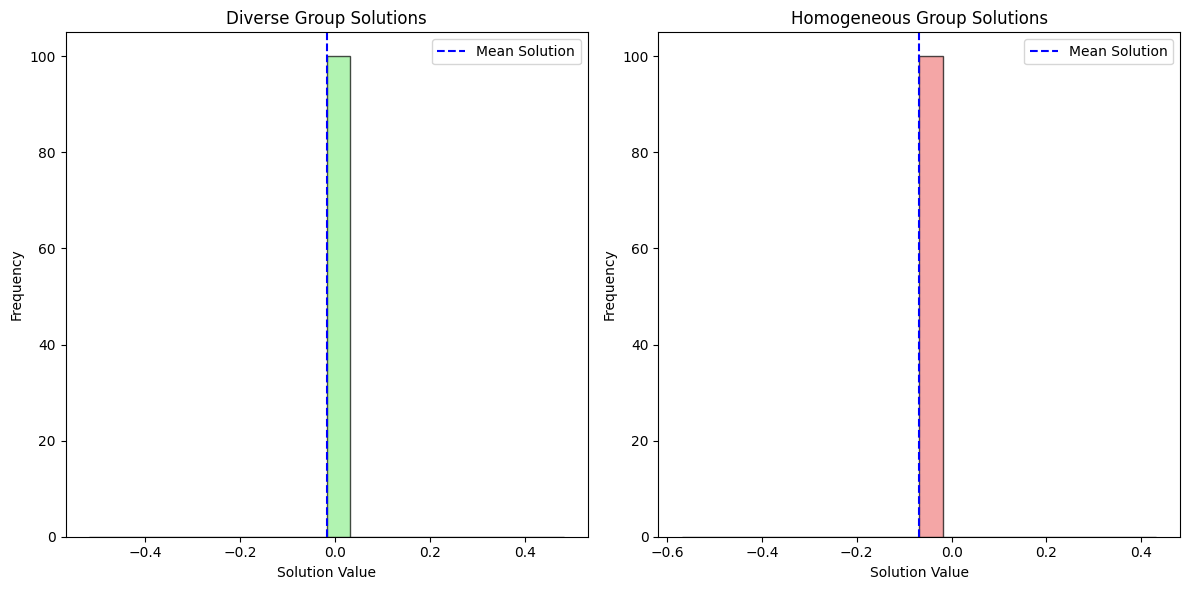

Diverse Group: Best Solution = -0.0178, Mean Solution = -0.0178
Homogeneous Group: Best Solution = -0.0686, Mean Solution = -0.0686


In [16]:
# Function to simulate problem-solving
def simulate_problem_solving(num_individuals, diverse=True, runs=10):
    # Create a graph
    G = nx.Graph()

    # Add nodes
    G.add_nodes_from(range(num_individuals))

    # Assign perspectives
    if diverse:
        # Diverse group with a range of perspectives
        perspectives = np.random.rand(num_individuals)  # Uniform distribution for diversity
    else:
        # Homogeneous group with a narrow range of perspectives
        perspectives = np.random.normal(loc=0.5, scale=0.1, size=num_individuals)
        perspectives = np.clip(perspectives, 0, 1)  # Ensure values are between 0 and 1

    nx.set_node_attributes(G, {i: perspectives[i] for i in range(num_individuals)}, 'perspective')

    # Create complete graph
    for i in range(num_individuals):
        for j in range(i + 1, num_individuals):
            G.add_edge(i, j)

    best_solutions = []

    # Simulate multiple runs
    for _ in range(runs):
        solutions = {}
        for i in G.nodes:
            start_value = perspectives[i]
            solution = complex_problem(start_value)
            solutions[i] = solution
        
        # Store the best solution for this run
        best_solution_node = min(solutions, key=solutions.get)
        best_solutions.append(solutions[best_solution_node])

    return best_solutions, perspectives

# Problem space (remains consistent)
def complex_problem(x):
    # Keep the complex problem unchanged
    return np.sin(5 * np.pi * x) * (1 - x) ** 2  # Problem with local minima

# Set parameters
num_individuals = 10
runs = 100

# Simulate diverse and homogeneous groups
diverse_best_solutions, diverse_perspectives = simulate_problem_solving(num_individuals, diverse=True, runs=runs)
homogeneous_best_solutions, homogeneous_perspectives = simulate_problem_solving(num_individuals, diverse=False, runs=runs)

# Plotting the results
plt.figure(figsize=(12, 6))

# Diverse Group
plt.subplot(1, 2, 1)
plt.hist(diverse_best_solutions, bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(diverse_best_solutions), color='blue', linestyle='dashed', linewidth=1.5, label='Mean Solution')
plt.title("Diverse Group Solutions")
plt.xlabel("Solution Value")
plt.ylabel("Frequency")
plt.legend()

# Homogeneous Group
plt.subplot(1, 2, 2)
plt.hist(homogeneous_best_solutions, bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(homogeneous_best_solutions), color='blue', linestyle='dashed', linewidth=1.5, label='Mean Solution')
plt.title("Homogeneous Group Solutions")
plt.xlabel("Solution Value")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

# Summary of results
print(f"Diverse Group: Best Solution = {min(diverse_best_solutions):.4f}, Mean Solution = {np.mean(diverse_best_solutions):.4f}")
print(f"Homogeneous Group: Best Solution = {min(homogeneous_best_solutions):.4f}, Mean Solution = {np.mean(homogeneous_best_solutions):.4f}")


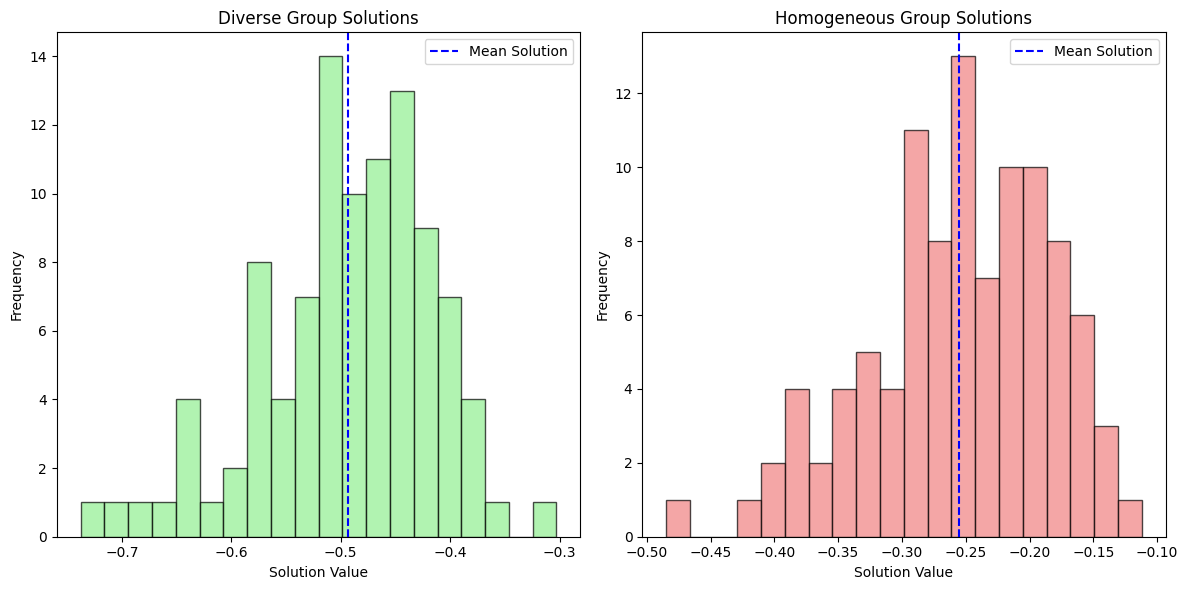

Diverse Group: Best Solution = -0.7378, Mean Solution = -0.4936
Homogeneous Group: Best Solution = -0.4849, Mean Solution = -0.2550


In [18]:
# Function to simulate problem-solving with more local minima and added randomness
def complex_problem(x):
    """A problem with more local minima and random disturbances."""
    noise = np.random.normal(0, 0.1)  # Adding randomness
    return np.sin(10 * np.pi * x) * (1 - x)**2 + noise

# Function to simulate problem-solving
def simulate_problem_solving(num_individuals, diverse=True, runs=10):
    # Assign perspectives
    if diverse:
        perspectives = np.random.rand(num_individuals)  # Diverse group with a range of perspectives
    else:
        perspectives = np.random.normal(loc=0.5, scale=0.1, size=num_individuals)  # Homogeneous group
        perspectives = np.clip(perspectives, 0, 1)  # Clip values to be between 0 and 1

    best_solutions = []

    # Simulate multiple runs
    for _ in range(runs):
        solutions = {}
        for i in range(num_individuals):
            start_value = perspectives[i]
            solution = complex_problem(start_value)
            solutions[i] = solution
        
        # Store the best solution for this run
        best_solution_value = min(solutions.values())
        best_solutions.append(best_solution_value)

    return best_solutions

# Set parameters
num_individuals = 10
runs = 100

# Simulate diverse and homogeneous groups
diverse_best_solutions = simulate_problem_solving(num_individuals, diverse=True, runs=runs)
homogeneous_best_solutions = simulate_problem_solving(num_individuals, diverse=False, runs=runs)

# Plotting the results
plt.figure(figsize=(12, 6))

# Diverse Group
plt.subplot(1, 2, 1)
plt.hist(diverse_best_solutions, bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(diverse_best_solutions), color='blue', linestyle='dashed', linewidth=1.5, label='Mean Solution')
plt.title("Diverse Group Solutions")
plt.xlabel("Solution Value")
plt.ylabel("Frequency")
plt.legend()

# Homogeneous Group
plt.subplot(1, 2, 2)
plt.hist(homogeneous_best_solutions, bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(homogeneous_best_solutions), color='blue', linestyle='dashed', linewidth=1.5, label='Mean Solution')
plt.title("Homogeneous Group Solutions")
plt.xlabel("Solution Value")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

# Summary of results
print(f"Diverse Group: Best Solution = {min(diverse_best_solutions):.4f}, Mean Solution = {np.mean(diverse_best_solutions):.4f}")
print(f"Homogeneous Group: Best Solution = {min(homogeneous_best_solutions):.4f}, Mean Solution = {np.mean(homogeneous_best_solutions):.4f}")


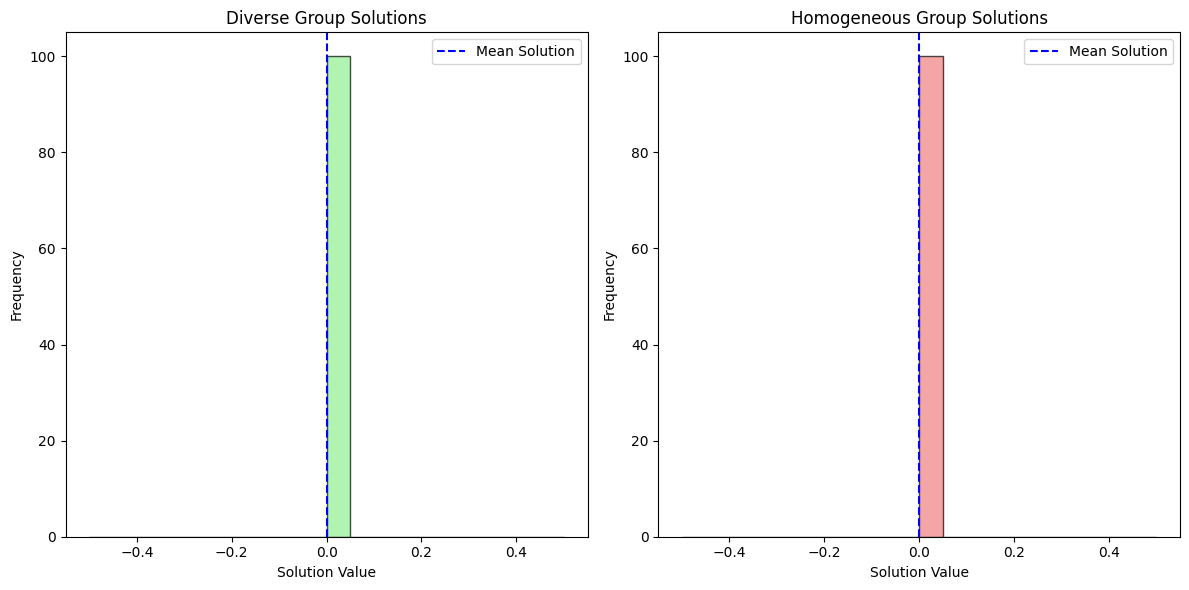

Diverse Group: Best Solution = 0.0000, Mean Solution = 0.0000
Homogeneous Group: Best Solution = 0.0001, Mean Solution = 0.0001


In [20]:
# Function to simulate problem-solving
def complex_problem(x):
    """A simple problem with a single global minimum."""
    return (x - 0.5) ** 2  # A simple parabola with a minimum at x = 0.5

# Function to simulate problem-solving for both groups
def simulate_problem_solving(num_individuals, diverse=True, runs=10):
    # Assign perspectives
    if diverse:
        # Diverse group with a range of perspectives
        perspectives = np.random.rand(num_individuals)  # Uniform distribution
    else:
        # Homogeneous group with a narrower range of perspectives
        perspectives = np.random.normal(loc=0.5, scale=0.1, size=num_individuals)  # Normal distribution
        perspectives = np.clip(perspectives, 0, 1)  # Ensure values are between 0 and 1

    best_solutions = []

    # Simulate multiple runs
    for _ in range(runs):
        solutions = {}
        for i in range(num_individuals):
            start_value = perspectives[i]
            solution = complex_problem(start_value)
            solutions[i] = solution
        
        # Store the best solution for this run
        best_solution_value = min(solutions.values())
        best_solutions.append(best_solution_value)

    return best_solutions

# Set parameters
num_individuals = 10
runs = 100

# Simulate diverse and homogeneous groups
diverse_best_solutions = simulate_problem_solving(num_individuals, diverse=True, runs=runs)
homogeneous_best_solutions = simulate_problem_solving(num_individuals, diverse=False, runs=runs)

# Plotting the results
plt.figure(figsize=(12, 6))

# Diverse Group
plt.subplot(1, 2, 1)
plt.hist(diverse_best_solutions, bins=20, color='lightgreen', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(diverse_best_solutions), color='blue', linestyle='dashed', linewidth=1.5, label='Mean Solution')
plt.title("Diverse Group Solutions")
plt.xlabel("Solution Value")
plt.ylabel("Frequency")
plt.legend()

# Homogeneous Group
plt.subplot(1, 2, 2)
plt.hist(homogeneous_best_solutions, bins=20, color='lightcoral', edgecolor='black', alpha=0.7)
plt.axvline(np.mean(homogeneous_best_solutions), color='blue', linestyle='dashed', linewidth=1.5, label='Mean Solution')
plt.title("Homogeneous Group Solutions")
plt.xlabel("Solution Value")
plt.ylabel("Frequency")
plt.legend()

plt.tight_layout()
plt.show()

# Summary of results
print(f"Diverse Group: Best Solution = {min(diverse_best_solutions):.4f}, Mean Solution = {np.mean(diverse_best_solutions):.4f}")
print(f"Homogeneous Group: Best Solution = {min(homogeneous_best_solutions):.4f}, Mean Solution = {np.mean(homogeneous_best_solutions):.4f}")

C:\Users\yunus\AppData\Local\Temp\ipykernel_18488\539655166.py:32: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([simple_performance, moderate_performance, complex_performance],


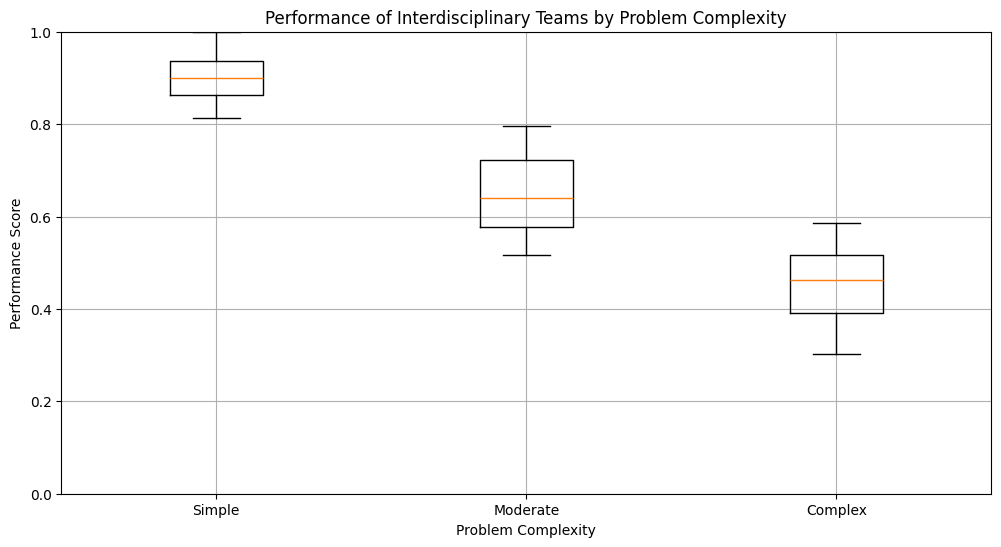

In [22]:
import random

# Define problem complexity levels
complexity_levels = [1, 2, 3]  # 1 = simple, 2 = moderate, 3 = complex

# Function to simulate performance based on diversity and complexity
def simulate_interdisciplinary_performance(num_groups, complexity):
    performance_scores = []
    for _ in range(num_groups):
        # Simulate a diverse team performing at different scores based on complexity
        if complexity == 1:
            score = random.uniform(0.8, 1.0)  # High performance in simple tasks
        elif complexity == 2:
            score = random.uniform(0.5, 0.8)  # Moderate performance in moderate tasks
        else:
            score = random.uniform(0.3, 0.6)  # Lower performance in complex tasks
        performance_scores.append(score)
    return performance_scores

# Set parameters
num_groups = 50

# Simulate performance for different complexities
simple_performance = simulate_interdisciplinary_performance(num_groups, complexity=1)
moderate_performance = simulate_interdisciplinary_performance(num_groups, complexity=2)
complex_performance = simulate_interdisciplinary_performance(num_groups, complexity=3)

# Plotting results
plt.figure(figsize=(12, 6))
plt.boxplot([simple_performance, moderate_performance, complex_performance],
            labels=['Simple', 'Moderate', 'Complex'])
plt.title('Performance of Interdisciplinary Teams by Problem Complexity')
plt.ylabel('Performance Score')
plt.xlabel('Problem Complexity')
plt.ylim(0, 1)
plt.grid()
plt.show()
